### Student Information
Name:黃有璿

Student ID:109062505

GitHub ID:anitahuang121


---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

# PART I

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [3]:
#using query, can set conditions to choose data
X.query('category<2 & index%100==0')

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
100   From: mathew <mathew@mantis.co.uk> Subject: Re...         0   
300   Subject: Re: Yet more Rushdie [Re: ISLAMIC LAW...         0   
400   From: nfotis@ntua.gr (Nick C. Fotis) Subject: ...         1   
500   From: qpliu@phoenix.Princeton.EDU (q.p.liu) Su...         0   
600   From: "Robert Knowles" <p00261@psilink.com> Su...         0   
700   From: jaeger@buphy.bu.edu (Gregg Jaeger) Subje...         0   
900   From: pes@hutcs.cs.hut.fi (Pekka Siltanen) Sub...         1   
1000  From: bobs@thnext.mit.edu (Robert Singleton) S...         0   
1100  From: andrey@cco.caltech.edu (Andre T. Yew) Su...         1   
1400  From: r0506048@cml3 (Chun-Hung Lin) Subject: R...         1   
1500  From: dgf1@ellis.uchicago.edu (David Farley) S...         1   
1600  From: healta@saturn.wwc.edu (Tammy R Healy) Su...         0   
1800  From: sandvik@newton.apple.com (Kent Sandvik) ...         0   
1900  Subject: XGA-2 info? From: rleberle@sparc2.cst...         1   
2000  From: MANDTBACKA@FINABO.ABO.FI (Mats Andtbacka...         0   
2100  From: alan@saturn.cs.swin.OZ.AU (Alan Christia...         1   
2200  From: thomas@ramsey.cs.laurentian.ca (F. Thoma...         1   

      category_name  
0     comp.graphics  
100     alt.atheism  
300     alt.atheism  
400   comp.graphics  
500     alt.atheism  
600     alt.atheism  
700     alt.atheism  
900   comp.graphics  
1000    alt.atheism  
1100  comp.graphics  
1400  comp.graphics  
1500  comp.graphics  
1600    alt.atheism  
1800    alt.atheism  
1900  comp.graphics  
2000    alt.atheism  
2100  comp.graphics  
2200  comp.graphics

In [4]:
#access by column name
X.loc[::10,'text':'category_name'][0:10]

text  category  \
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1   
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3   
20  From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...         3   
30  From: vgwlu@dunsell.calgary.chevron.com (greg ...         2   
40  From: david-s@hsr.no (David A. Sjoen) Subject:...         3   
50  From: ab@nova.cc.purdue.edu (Allen B) Subject:...         1   
60  From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...         0   
70  From: weaver@chdasic.sps.mot.com (Dave Weaver)...         3   
80  From: annick@cortex.physiol.su.oz.au (Annick A...         2   
90  Subject: Vonnegut/atheism From: dmn@kepler.unh...         0   

             category_name  
0            comp.graphics  
10  soc.religion.christian  
20  soc.religion.christian  
30                 sci.med  
40  soc.religion.christian  
50           comp.graphics  
60             alt.atheism  
70  soc.religion.christian  
80                 sci.med  
90             alt.atheism

In [5]:
# using loc and call by index
X.loc[[10,25,36,153],:]

text  category  \
10   From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3   
25   From: dstampe@psych.toronto.edu (Dave Stampe) ...         1   
36   From: keith@cco.caltech.edu (Keith Allan Schne...         0   
153  From: keith@cco.caltech.edu (Keith Allan Schne...         0   

              category_name  
10   soc.religion.christian  
25            comp.graphics  
36              alt.atheism  
153             alt.atheism

In [6]:
# using iloc
X.iloc[10:20, 0:2]

text  category
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1
12  From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...         0
13  Subject: So what is Maddi? From: madhaus@netco...         0
14  From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1
15  From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1
16  From: texx@ossi.com (Robert "Texx" Woodworth) ...         2
17  Organization: Penn State University From: <JSN...         0
18  From: tom_milligan@rainbow.mentorg.com Subject...         3
19  Subject: Re: Don't more innocents die without ...         0

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [7]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [8]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

##### Answer
for C,D,E's missing example, .isnull() views them as a string

.isnull() : This function takes a scalar or array-like object and indicates whether values are missing 

(NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike).

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [9]:
X_sample = X.sample(n=1000) #random state
len(X_sample)

1000

In [10]:
X_sample[0:4]

text  category  \
1602  Subject: Cornerstone DualPage driver wanted Fr...         1   
266   From: REXLEX@fnal.fnal.gov Subject: Re: Certai...         3   
405   From: szikopou@superior.carleton.ca (Steven Zi...         2   
411   From: menon@boulder.Colorado.EDU (Ravi or Dean...         2   

               category_name  
1602           comp.graphics  
266   soc.religion.christian  
405                  sci.med  
411                  sci.med

# Answer
### X has no any change, but there is something different between X and X_sampling
the index of X_sampling is not sequentially, and the total data number will not be same as X(it depends on how many data we want to sample)

moreover, every time we execute .sample(), it will get different result, for example: 

the index of X_sample[0:4] are:

first time: 23,79,459,1490

second time: 643,1666,1037,1370

third time: 1042,982,2169,1494

forth time: 784,982,588,1567

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


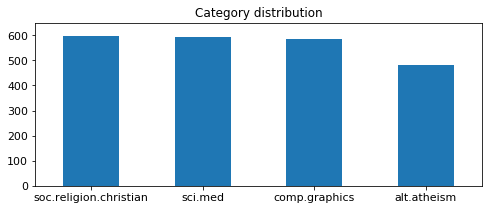

In [12]:
print(X.category_name.value_counts())

# plot barchart for X_sample
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))


comp.graphics             264
soc.religion.christian    262
sci.med                   257
alt.atheism               217
Name: category_name, dtype: int64


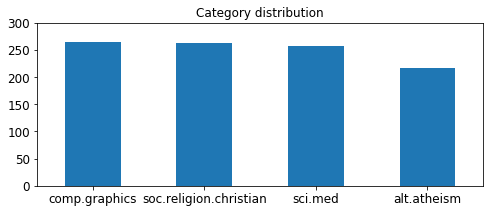

In [13]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 
![alt txt](https://i.imgur.com/9eO431H.png)

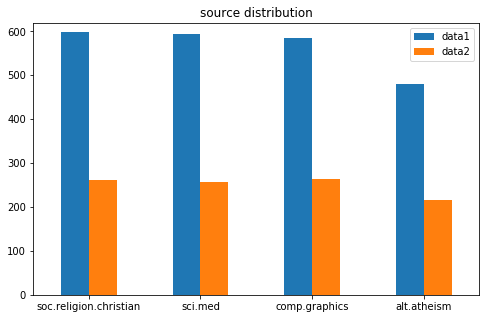

In [14]:
upper_bound = max(X.category_name.value_counts())+20
labels = X.category_name.value_counts().index
a = X.category_name.value_counts()
b = X_sample.category_name.value_counts()

DF = pd.DataFrame({'data1' : a , 'data2' : b } , index = labels)
DF.plot.bar(title = 'source distribution' , ylim = [0 , upper_bound] ,rot = 0 , figsize = (8,5))


### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [16]:
# All the 1 of the fifth record represent's words
X_temp = X_counts[4, 0:100].toarray()
print(count_vect.inverse_transform(X_temp)[0])

['00' '01']


In [17]:
# the second 1 of the fifth record represents the 01 term.
print(count_vect.inverse_transform(X_temp)[0][1])

01


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

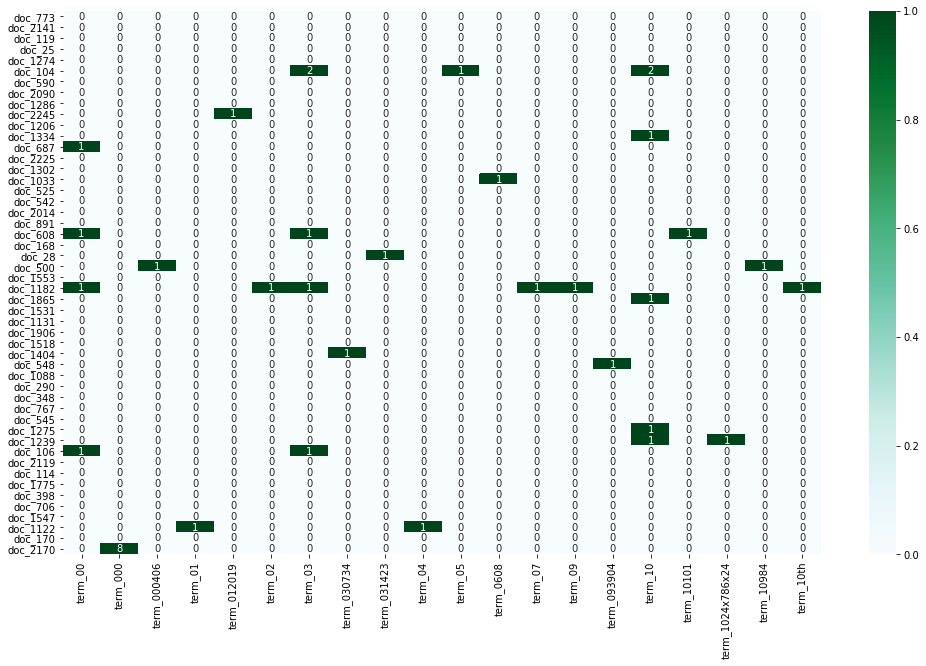

In [18]:
import seaborn as sns
s = X.sample(50)

X_test = count_vect.fit_transform(s.text)

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(s.index)]
plot_z = X_test[0:50, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(17, 10))
ax = sns.heatmap(df_todraw,
                 cmap="BuGn",
                 vmin=0, vmax=1, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

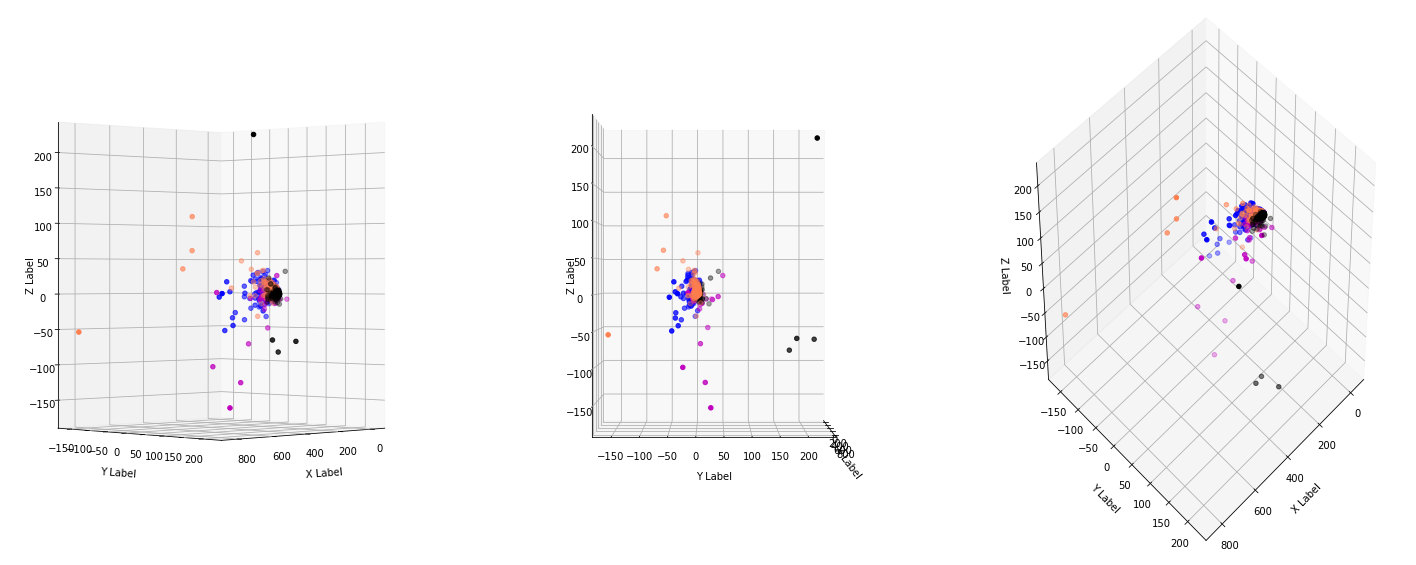

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt #繪圖用的模組
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D #繪製3D座標的函式

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'm']

fig1=plt.figure(figsize = (25,10))#建立一個繪圖物件
gs = gridspec.GridSpec(ncols=3, nrows=1, figure=fig1)
#gs = fig1.add_gridspec(1, 3)
ax1 = fig1.add_subplot(gs[0, 0], projection = '3d')
ax2 = fig1.add_subplot(gs[0, 1], projection = '3d')
ax3 = fig1.add_subplot(gs[0, 2], projection = '3d')

#ax1=Axes3D(fig1)#用這個繪圖物件建立一個Axes物件(有3D座標)


for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax1.scatter(xs, ys, zs, c = c, marker='o')
    ax1.view_init(0, 45)
    ax2.scatter(xs, ys, zs, c = c, marker='o')
    ax2.view_init(0, 0)
    ax3.scatter(xs, ys, zs, c = c, marker='o')
    ax3.view_init(45, 45)

ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')

ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')

ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')


plt.show()

### answer
How I find is that if we reduce dimention to 3, it is more clear to see the different between the categories and in the dimention 3 graph, we can find that dots of 'soc.religion.christian' are very close.

However, I think that if we reduce the features to less dimention may help clustering, but if we want to training, it may not be a good choice.

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [20]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
import plotly.express as px 

term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]


features = count_vect.get_feature_names()[300:445] 
num = term_frequencies[300:445]
dict = {"features": features,  
        "num": num
       }

test_df = pd.DataFrame(dict)
test_df['features'] = test_df['features'].astype(str)
print(test_df)
fig = px.bar(test_df,
              x='features',
              y='num'
             )
fig.show()

       features  num
0        alexis    5
1     algorithm    1
2           ali    1
3         alien    1
4         alike    1
..          ...  ...
140  associated    4
141      assume    2
142     assumed    2
143    assuming    5
144  assumption    1

[145 rows x 2 columns]


### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [21]:
features = count_vect.get_feature_names()[0:2000] 
num = term_frequencies[0:2000]
dict = {"features": features,  
        "num": num
       }

test_df = pd.DataFrame(dict)
test_df['features'] = test_df['features'].astype(str)
DF1=test_df[test_df.num >=5 ]
print(DF1)
fig = px.bar(DF1,
              x='features',
              y='num'
             )
fig.show()


     features  num
0          00  134
1         000   92
34         14    5
36       1460   13
37         15   95
...       ...  ...
1948  leonard   11
1949     less   11
1984   living   15
1986      lm5   88
1987     load    8

[230 rows x 2 columns]


### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [22]:
DF2 = DF1.sort_values(by=['num'],ascending = False)
fig = px.bar(DF2,
              x='features',
              y='num'
             )
fig.show()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [23]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
mlb.classes_
X['bin_category'] = mlb.transform(X['category']).tolist()
X[0:9]


text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name  bin_category  
0           comp.graphics  [0, 1, 0, 0]  
1           comp.graphics  [0, 1, 0, 0]  
2  soc.religion.christian  [0, 0, 0, 1]  
3  soc.religion.christian  [0, 0, 0, 1]  
4  soc.religion.christian  [0, 0, 0, 1]  
5  soc.religion.christian  [0, 0, 0, 1]  
6  soc.religion.christian  [0, 0, 0, 1]  
7                 sci.med  [0, 0, 1, 0]  
8                 sci.med  [0, 0, 1, 0]

In [24]:
mlb.fit(X.category_name)
mlb.classes_
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name  bin_category bin_category_name  
0           comp.graphics  [0, 1, 0, 0]      [0, 1, 0, 0]  
1           comp.graphics  [0, 1, 0, 0]      [0, 1, 0, 0]  
2  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
3  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
4  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
5  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
6  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
7                 sci.med  [0, 0, 1, 0]      [0, 0, 1, 0]  
8                 sci.med  [0, 0, 1, 0]      [0, 0, 1, 0]

### answer
Yes, it works.
And the result is same as binarization using the 'category'

# PART2

 ## 1. Converting Dictionary into Pandas Dataframe and adding columns

In [25]:
#read data from three txt files and source implies which file the datas came from

import pandas as pd
import helpers.data_mining_helpers as dmh
df1 = pd.read_csv('sentiment labelled sentences/amazon_cells_labelled.txt', sep="\t",header=None)
df1.columns = ["Text", "Score"]
df1['Source'] = "amazon"

df2 = pd.read_csv('sentiment labelled sentences/imdb_labelled.txt', sep="\t",header=None)
df2.columns = ["Text", "Score"]
df2['Source'] = "imdb"

df3 = pd.read_csv('sentiment labelled sentences/yelp_labelled.txt', sep="\t",header=None)
df3.columns = ["Text", "Score"]
df3['Source'] = "yelp"
   
frames = [df1,df2,df3]
df = pd.concat(frames,ignore_index=True)
print(df)

                                                   Text  Score  Source
0     So there is no way for me to plug it in here i...      0  amazon
1                           Good case, Excellent value.      1  amazon
2                                Great for the jawbone.      1  amazon
3     Tied to charger for conversations lasting more...      0  amazon
4                                     The mic is great.      1  amazon
...                                                 ...    ...     ...
2743  I think food should have flavor and texture an...      0    yelp
2744                           Appetite instantly gone.      0    yelp
2745  Overall I was not impressed and would not go b...      0    yelp
2746  The whole experience was underwhelming, and I ...      0    yelp
2747  Then, as if I hadn't wasted enough of my life ...      0    yelp

[2748 rows x 3 columns]


## 2. Querying data

In [26]:
df[0:10]

Text  Score  Source
0  So there is no way for me to plug it in here i...      0  amazon
1                        Good case, Excellent value.      1  amazon
2                             Great for the jawbone.      1  amazon
3  Tied to charger for conversations lasting more...      0  amazon
4                                  The mic is great.      1  amazon
5  I have to jiggle the plug to get it to line up...      0  amazon
6  If you have several dozen or several hundred c...      0  amazon
7        If you are Razr owner...you must have this!      1  amazon
8                Needless to say, I wasted my money.      0  amazon
9                   What a waste of money and time!.      0  amazon

In [27]:
# using loc (by position)
df.iloc[::100, 0:3][0:20]

Text  Score  Source
0     So there is no way for me to plug it in here i...      0  amazon
100   Integrated seamlessly with the Motorola RAZR p...      1  amazon
200   The color is even prettier than I thought it w...      1  amazon
300                                    Sending it back.      0  amazon
400                               what a disappointment      0  amazon
500   The bose noise cancelling is amazing, which is...      1  amazon
600   Their Research and Development division obviou...      1  amazon
700   Also, the phone doesn't seem to accept anythin...      0  amazon
800                                  Good , works fine.      1  amazon
900   This was utterly confusing at first, which cau...      0  amazon
1000  A very, very, very slow-moving, aimless movie ...      0    imdb
1100  If you do go see this movie, bring a pillow or...      0    imdb
1200  Non-linear narration thus many flashbacks and ...      1    imdb
1300  Initially the local sites in the film, which w...      1    imdb
1400  Every element of this story was so over the to...      0    imdb
1500         It's a case of 'so bad it is laughable'.        0    imdb
1600  It is wonderful and inspiring to watch, and I ...      1    imdb
1700  It presents a idyllic yet serious portrayal of...      1    imdb
1800                        Their chow mein is so good!      1    yelp
1900          We waited for forty five minutes in vain.      0    yelp

In [28]:
# using loc (by label)
df.loc[::10, 'Text'][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: Text, dtype: object

In [29]:
# standard query (Cannot simultaneously select rows and columns)
df[::10][0:10]

Text  Score  Source
0   So there is no way for me to plug it in here i...      0  amazon
10                    And the sound quality is great.      1  amazon
20  I went on Motorola's website and followed all ...      0  amazon
30  This is a simple little phone to use, but the ...      0  amazon
40  It has a great camera thats 2MP, and the pics ...      1  amazon
50  Not loud enough and doesn't turn on like it sh...      0  amazon
60  Essentially you can forget Microsoft's tech su...      0  amazon
70                                  Mic Doesn't work.      0  amazon
80      I wear it everyday and it holds up very well.      1  amazon
90  For a product that costs as much as this one d...      0  amazon

In [30]:
df.loc[lambda f : f.Score == 1 ].iloc[::100][0:10]

Text  Score  Source
1                           Good case, Excellent value.      1  amazon
196                         You'll love how thin it is.      1  amazon
384                                       Magical Help.      1  amazon
578   It does everything the description said it would.      1  amazon
778                               This is a great deal.      1  amazon
1004  The best scene in the movie was when Gerardo i...      1    imdb
1214  Not too screamy not to masculine but just righ...      1    imdb
1462  This is a witty and delightful adaptation of t...      1    imdb
1621  The characters are fleshed out surprisingly we...      1    imdb
1778  Also there are combos like a burger, fries, an...      1    yelp

## 3. Missing Values


In [31]:
#check missing values
df.isnull()

Text  Score  Source
0     False  False   False
1     False  False   False
2     False  False   False
3     False  False   False
4     False  False   False
...     ...    ...     ...
2743  False  False   False
2744  False  False   False
2745  False  False   False
2746  False  False   False
2747  False  False   False

[2748 rows x 3 columns]

In [32]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

Text      (The amoung of missing records is: , 0)
Score     (The amoung of missing records is: , 0)
Source    (The amoung of missing records is: , 0)
dtype: object

In [33]:
df.isnull().apply(lambda x: dmh.check_missing_values(x),axis = 1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2743    (The amoung of missing records is: , 0)
2744    (The amoung of missing records is: , 0)
2745    (The amoung of missing records is: , 0)
2746    (The amoung of missing records is: , 0)
2747    (The amoung of missing records is: , 0)
Length: 2748, dtype: object

In [34]:
#add dummy data into result_with_series
Dummy_series = pd.Series(["Dummy_record", 1], index=["Text", "Score"])
Result_with_series = df.append(Dummy_series, ignore_index=True)
len(Result_with_series)

2749

In [35]:
Result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

Text      (The amoung of missing records is: , 0)
Score     (The amoung of missing records is: , 0)
Source    (The amoung of missing records is: , 1)
dtype: object

In [36]:
# dummy record as dictionary format
Dummy_dict = [{'Text': 'dummy_record',
               'Score': 1
              }]
df = df.append(Dummy_dict, ignore_index=True)
len(df)

2749

In [37]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

Text      (The amoung of missing records is: , 0)
Score     (The amoung of missing records is: , 0)
Source    (The amoung of missing records is: , 1)
dtype: object

In [38]:
df.dropna(inplace=True)
df.isnull().apply(lambda x: dmh.check_missing_values(x))

Text      (The amoung of missing records is: , 0)
Score     (The amoung of missing records is: , 0)
Source    (The amoung of missing records is: , 0)
dtype: object

In [39]:
len(df)

2748

## 4. Dealing with Duplicate Data

In [40]:
#calculate how many duplicate data
DUP = df.duplicated()
sum(DUP)

17

In [41]:
df[DUP]

Text  Score  Source
285                                       Great phone!.      1  amazon
407                                        Works great.      1  amazon
524                                       Works great!.      1  amazon
543                             Don't buy this product.      0  amazon
744   If you like a loud buzzing to override all you...      0  amazon
748                                       Does not fit.      0  amazon
778                               This is a great deal.      1  amazon
792                                        Great Phone.      1  amazon
892                    Excellent product for the price.      1  amazon
896                                        Great phone.      1  amazon
1165                   Definitely worth checking out.        1    imdb
1387                                 Not recommended.        0    imdb
1590                                            10/10        1    imdb
2562                                 I love this place.      1    yelp
2564                             The food was terrible.      0    yelp
2591                                   I won't be back.      0    yelp
2594                  I would not recommend this place.      0    yelp

In [42]:
df.drop_duplicates(keep='first', inplace=True) # inplace applies changes directly on our dataframe
#keep = 'first':留住重複的第一筆

In [43]:
sum(df.duplicated())

0

In [44]:
len(df)

2731

## 5. Data Preprocessing

In [45]:
df_sample = df.sample(n=1200)
len(df_sample)

1200

In [46]:
df_sample[0:4]

Text  Score  Source
882   The only good thing was that it fits comfortab...      1  amazon
2578  Do yourself a favor and stay away from this dish.      0    yelp
124                                  Gets the job done.      1  amazon
1167             This movie has a cutting edge to it.        1    imdb

yelp      996
amazon    990
imdb      745
Name: Source, dtype: int64


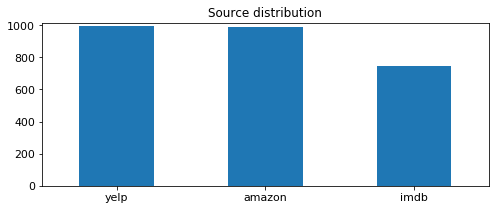

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

print(df.Source.value_counts())
df_upper_bound = max(df.Source.value_counts())+20

# plot barchart for df
df.Source.value_counts().plot(kind = 'bar',
                                    title = 'Source distribution',
                                    ylim = [0 , df_upper_bound],
                                    rot = 0, fontsize = 11, figsize = (8,3))

438


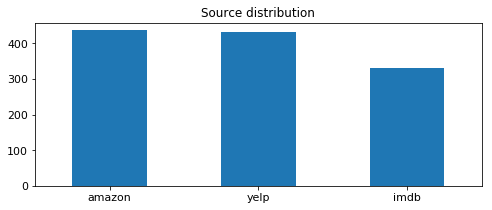

In [48]:
print(df_sample.Source.value_counts()[0])
df_sample_upper_bound = max(df_sample.Source.value_counts())+20

# plot barchart for df_sample
df_sample.Source.value_counts().plot(kind = 'bar',
                                    title = 'Source distribution',
                                    ylim = [0 , df_sample_upper_bound],
                                    rot = 0, fontsize = 11, figsize = (8,3))

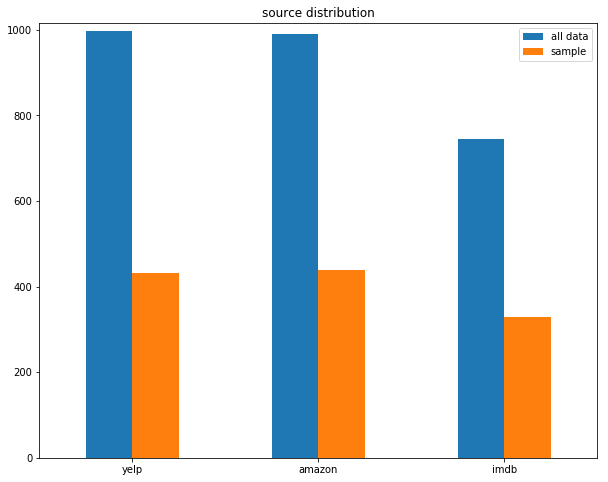

In [49]:
import numpy as np
labels = df.Source.value_counts().index
a = df.Source.value_counts()
b = df_sample.Source.value_counts()

DF = pd.DataFrame({'all data' : a , 'sample' : b } , index = labels)
DF.plot.bar(title = 'source distribution' , ylim = [0 , df_upper_bound] ,rot = 0 , figsize = (10,8))


## 6. Feature Creation

In [50]:
import nltk

# takes a like a minute or two to process
df['unigrams'] = df['Text'].apply(lambda x: dmh.tokenize_text(x))

In [51]:
df

Text  Score  Source  \
0     So there is no way for me to plug it in here i...      0  amazon   
1                           Good case, Excellent value.      1  amazon   
2                                Great for the jawbone.      1  amazon   
3     Tied to charger for conversations lasting more...      0  amazon   
4                                     The mic is great.      1  amazon   
...                                                 ...    ...     ...   
2743  I think food should have flavor and texture an...      0    yelp   
2744                           Appetite instantly gone.      0    yelp   
2745  Overall I was not impressed and would not go b...      0    yelp   
2746  The whole experience was underwhelming, and I ...      0    yelp   
2747  Then, as if I hadn't wasted enough of my life ...      0    yelp   

                                               unigrams  
0     [So, there, is, no, way, for, me, to, plug, it...  
1                  [Good, case, ,, Excellent, value, .]  
2                         [Great, for, the, jawbone, .]  
3     [Tied, to, charger, for, conversations, lastin...  
4                              [The, mic, is, great, .]  
...                                                 ...  
2743  [I, think, food, should, have, flavor, and, te...  
2744                     [Appetite, instantly, gone, .]  
2745  [Overall, I, was, not, impressed, and, would, ...  
2746  [The, whole, experience, was, underwhelming, ,...  
2747  [Then, ,, as, if, I, had, n't, wasted, enough,...  

[2731 rows x 4 columns]

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.Text)

# We can check the shape of this matrix by:
df_counts.shape

(2731, 5155)

In [53]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [54]:
# we convert from sparse array to normal array
df_counts[980:985, 500:600].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [55]:
#find which word is index 982's feature 505
df_temp = df_counts[982, 500:600].toarray()
print(count_vect.inverse_transform(df_temp)[0])

['13']


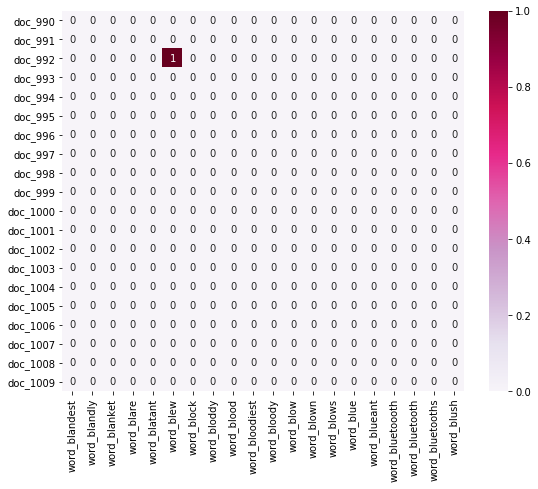

In [56]:
# twenty features only
Plot_x = ["word_"+str(i) for i in count_vect.get_feature_names()[500:520]]
# obtain document index
Plot_y = ["doc_"+ str(i) for i in list(df.index)[980:1000]]
Plot_z = df_counts[980:1000, 500:520].toarray()

import seaborn as sns

df_todraw = pd.DataFrame(Plot_z, columns = Plot_x, index = Plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

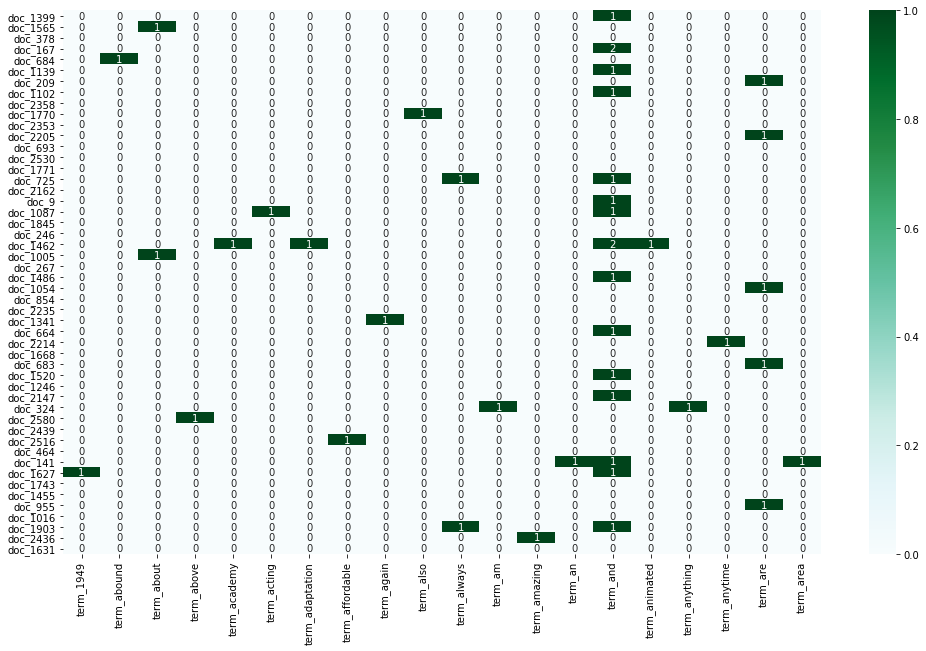

In [57]:

s = df.sample(50)

df_test = count_vect.fit_transform(s.Text)

Plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
Plot_y = ["doc_"+ str(i) for i in list(s.index)]
Plot_z = df_test[0:50, 0:20].toarray()

df_todraw = pd.DataFrame(Plot_z, columns = Plot_x, index = Plot_y)
plt.subplots(figsize=(17, 10))
ax = sns.heatmap(df_todraw,
                 cmap="BuGn",
                 vmin=0, vmax=1, annot=True)

## 7.Dimensionality Reduction

In [58]:
from sklearn.decomposition import PCA
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
df_reduced.shape

(2731, 2)

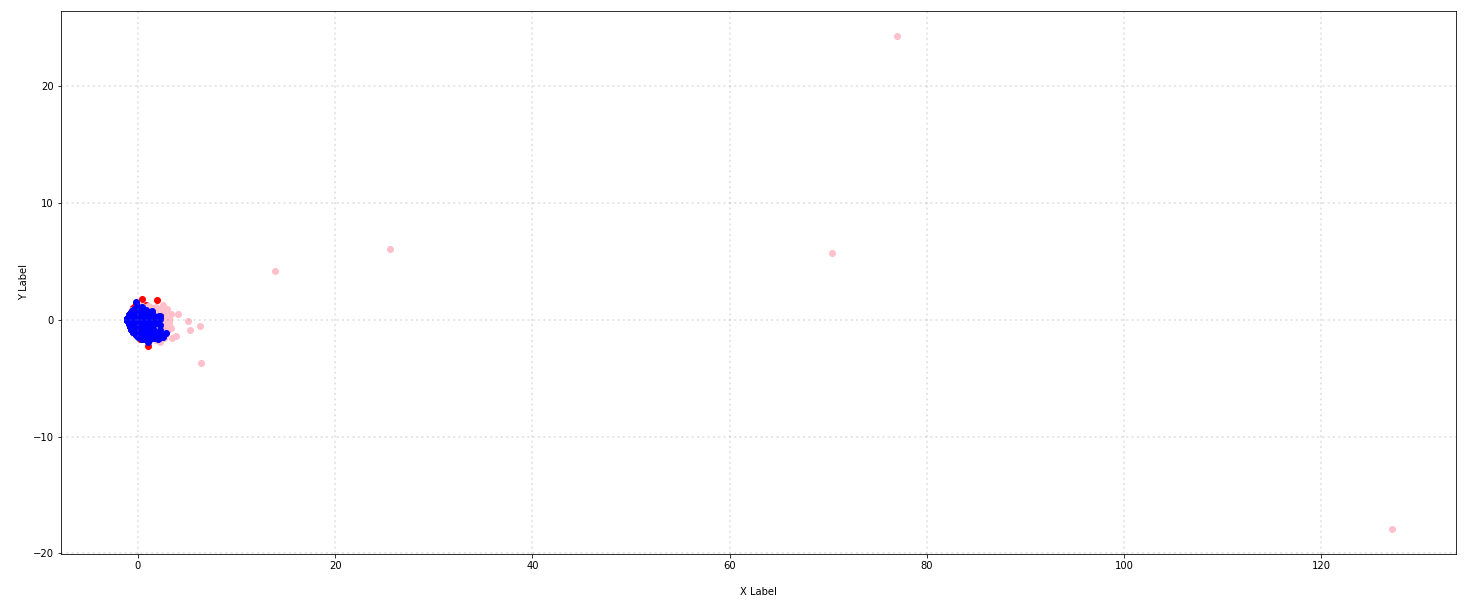

In [59]:
col = ['red', 'pink' , 'blue']
sources = ['amazon','imdb','yelp']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, source in zip(col, sources):
    xs = df_reduced[df['Source'] == source].T[0]
    ys = df_reduced[df['Source'] == source].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

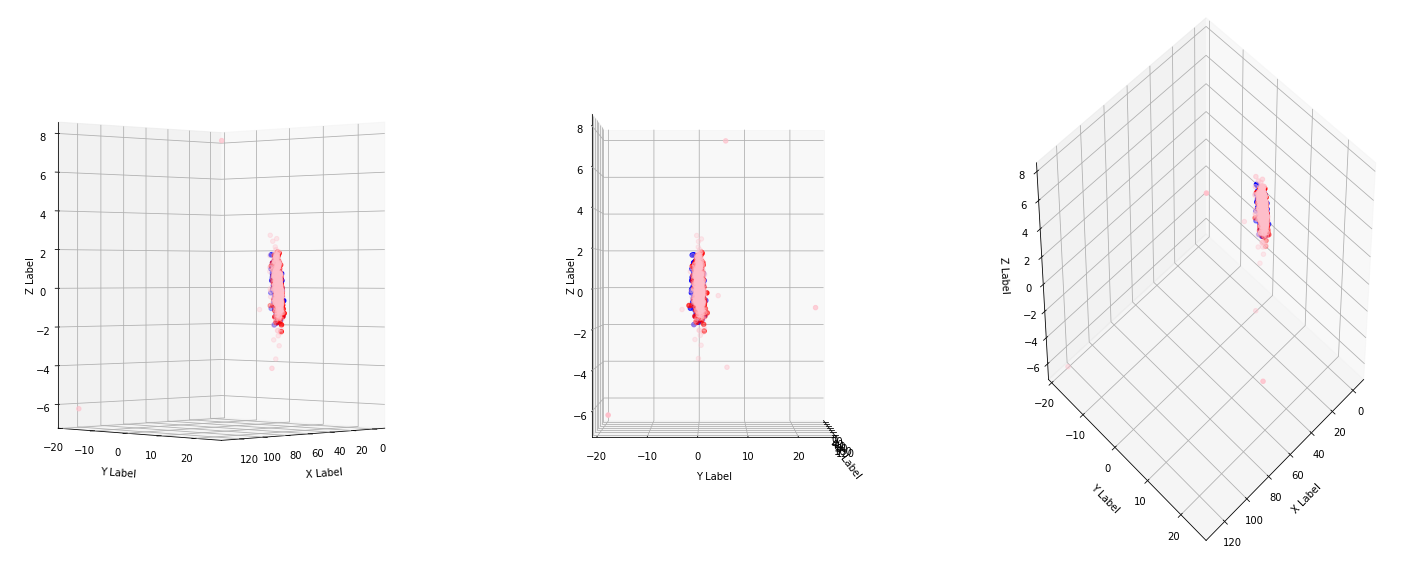

In [60]:
df_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())

import matplotlib.pyplot as plt #繪圖用的模組

import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D #繪製3D座標的函式

col = ['red', 'pink', 'blue']

fig1=plt.figure(figsize = (25,10))#建立一個繪圖物件
gs = gridspec.GridSpec(ncols=3, nrows=1, figure=fig1)
#gs = fig1.add_gridspec(1, 3)
ax1 = fig1.add_subplot(gs[0, 0], projection = '3d')
ax2 = fig1.add_subplot(gs[0, 1], projection = '3d')
ax3 = fig1.add_subplot(gs[0, 2], projection = '3d')

#ax1=Axes3D(fig1)#用這個繪圖物件建立一個Axes物件(有3D座標)


for c, source in zip(col, sources):
    xs = df_reduced[df['Source'] == source].T[0]
    ys = df_reduced[df['Source'] == source].T[1]
    zs = df_reduced[df['Source'] == source].T[2]
    ax1.scatter(xs, ys, zs, c = c, marker='o')
    ax1.view_init(0, 45)
    ax2.scatter(xs, ys, zs, c = c, marker='o')
    ax2.view_init(0, 0)
    ax3.scatter(xs, ys, zs, c = c, marker='o')
    ax3.view_init(45, 45)

ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')

ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')

ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')


plt.show()


## 8. Atrribute Transformation / Aggregation

In [61]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
Term_frequencies = []
for j in range(0,df_counts.shape[1]):
    Term_frequencies.append(sum(df_counts[:,j].toarray()))

Term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
Term_frequencies[0]

1

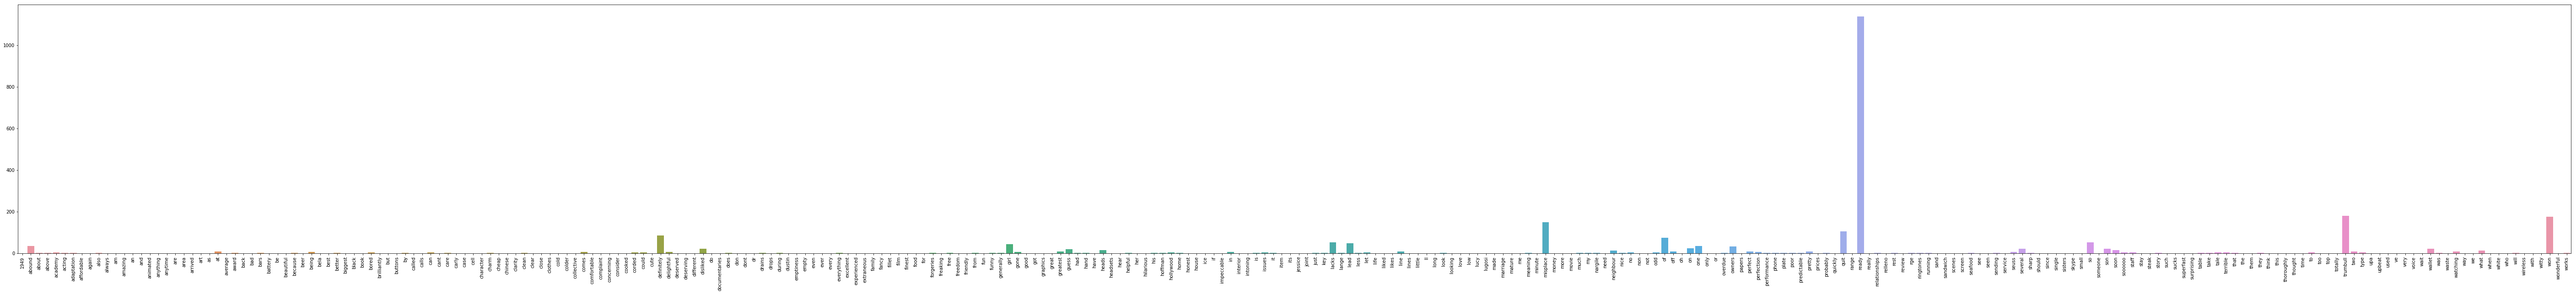

In [62]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=Term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [63]:
import plotly.express as px 
features = count_vect.get_feature_names()[0:300] 
num = Term_frequencies[0:300]
dict_df = {"features": features,  
        "num": num
       }

count_df = pd.DataFrame(dict)
count_df['features'] = count_df['features'].astype(str)
print(count_df)
fig = px.bar(count_df,
              x='features',
              y='num'
             )
fig.show()

      features  num
0           00  134
1          000   92
2       000406    1
3           01    2
4       012019    1
...        ...  ...
1995     loisc    1
1996    london    3
1997  lonestar    2
1998      long    1
1999      look    2

[2000 rows x 2 columns]


In [64]:
#only show frequency>=6's features
features = count_vect.get_feature_names()[0:359] 
num = term_frequencies[0:359]
dict_df = {"features": features,  
        "num": num
       }

count_df = pd.DataFrame(dict)
count_df['features'] = count_df['features'].astype(str)
df_left=count_df[count_df.num >=6 ]
print(df_left)
fig = px.bar(df_left,
              x='features',
              y='num'
             )
fig.show()

     features  num
0          00  134
1         000   92
36       1460   13
37         15   95
72     205509   59
...       ...  ...
1948  leonard   11
1949     less   11
1984   living   15
1986      lm5   88
1987     load    8

[181 rows x 2 columns]


In [65]:
#sorting by frequency
df_left2 = df_left.sort_values(by=['num'],ascending = False)
fig = px.bar(df_left2,
              x='features',
              y='num'
             )
fig.show()

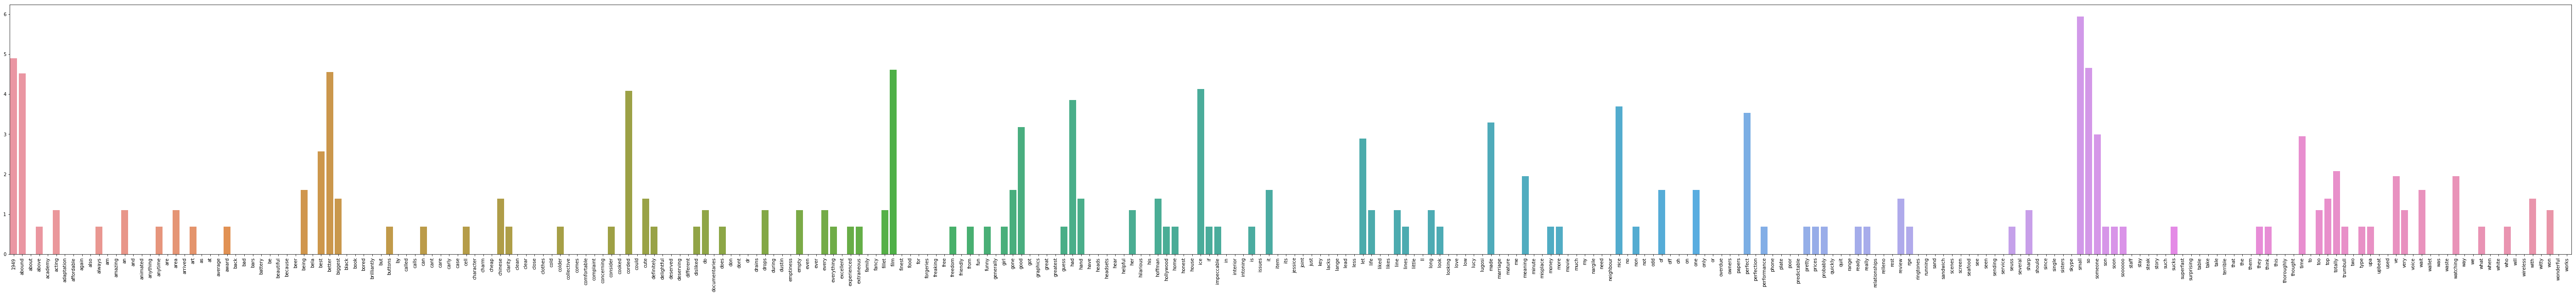

In [66]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

## 9. Discretization and Binarization

In [67]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.Source)

LabelBinarizer()

In [68]:
mlb.classes_

array(['amazon', 'imdb', 'yelp'], dtype='<U6')

In [69]:
df['bin_source'] = mlb.transform(df['Source']).tolist()

In [70]:
df

Text  Score  Source  \
0     So there is no way for me to plug it in here i...      0  amazon   
1                           Good case, Excellent value.      1  amazon   
2                                Great for the jawbone.      1  amazon   
3     Tied to charger for conversations lasting more...      0  amazon   
4                                     The mic is great.      1  amazon   
...                                                 ...    ...     ...   
2743  I think food should have flavor and texture an...      0    yelp   
2744                           Appetite instantly gone.      0    yelp   
2745  Overall I was not impressed and would not go b...      0    yelp   
2746  The whole experience was underwhelming, and I ...      0    yelp   
2747  Then, as if I hadn't wasted enough of my life ...      0    yelp   

                                               unigrams bin_source  
0     [So, there, is, no, way, for, me, to, plug, it...  [1, 0, 0]  
1                  [Good, case, ,, Excellent, value, .]  [1, 0, 0]  
2                         [Great, for, the, jawbone, .]  [1, 0, 0]  
3     [Tied, to, charger, for, conversations, lastin...  [1, 0, 0]  
4                              [The, mic, is, great, .]  [1, 0, 0]  
...                                                 ...        ...  
2743  [I, think, food, should, have, flavor, and, te...  [0, 0, 1]  
2744                     [Appetite, instantly, gone, .]  [0, 0, 1]  
2745  [Overall, I, was, not, impressed, and, would, ...  [0, 0, 1]  
2746  [The, whole, experience, was, underwhelming, ,...  [0, 0, 1]  
2747  [Then, ,, as, if, I, had, n't, wasted, enough,...  [0, 0, 1]  

[2731 rows x 5 columns]

## 10. Data Exploration

In [71]:
# We retrieve 3 sentences for a random record, here, indexed at 5 and 10 and 15
document_to_transform_1 = []
random_record_1 = df.iloc[5]
random_record_1 = random_record_1['Text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[10]
random_record_2 = random_record_2['Text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[15]
random_record_3 = random_record_3['Text']
document_to_transform_3.append(random_record_3)

In [72]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['I have to jiggle the plug to get it to line up right to get decent volume.']
['And the sound quality is great.']
['Highly recommend for any one who has a blue tooth phone.']


In [73]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 0 

In [74]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.111803
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# PART3

## 1. Visualization(wordcloud)

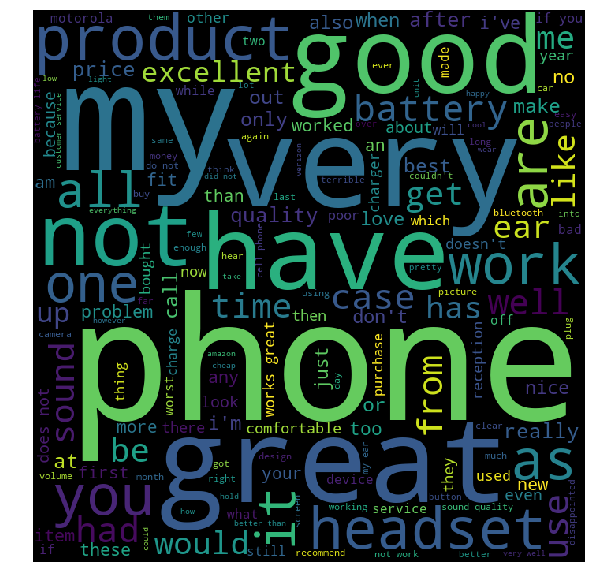

In [81]:
#from amazon
from wordcloud import WordCloud
# Iterating through the .csv data file 
comment_words = ''
for i in df1.Text: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    comment_words += " ".join(separate)+' '
stop_words = ['a','and','the','it','is','was','of','to','in','that','for','with','but','this','so','on']
# Creating the Word Cloud
final_wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words)
# Displaying the WordCloud                    
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

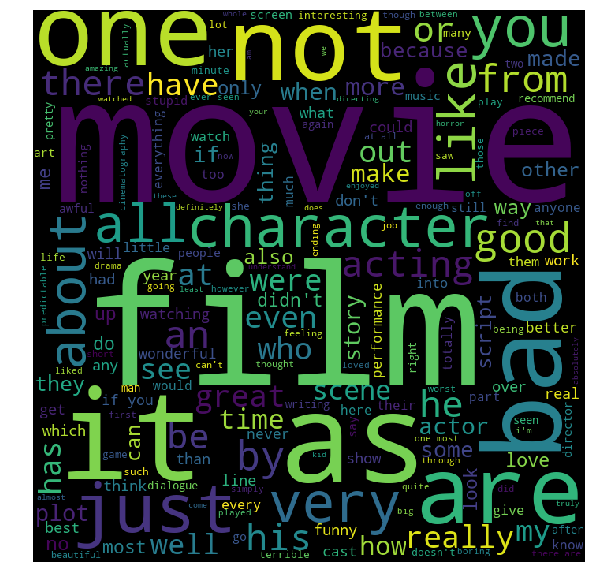

In [82]:
#from imdb

# Iterating through the .csv data file 
comment_words = ''
for i in df2.Text: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    comment_words += " ".join(separate)+' '
stop_words = ['a','and','the','it','is','was','of','to','in','that','for','with','but','this','so','on']
# Creating the Word Cloud
final_wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words)
# Displaying the WordCloud                    
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

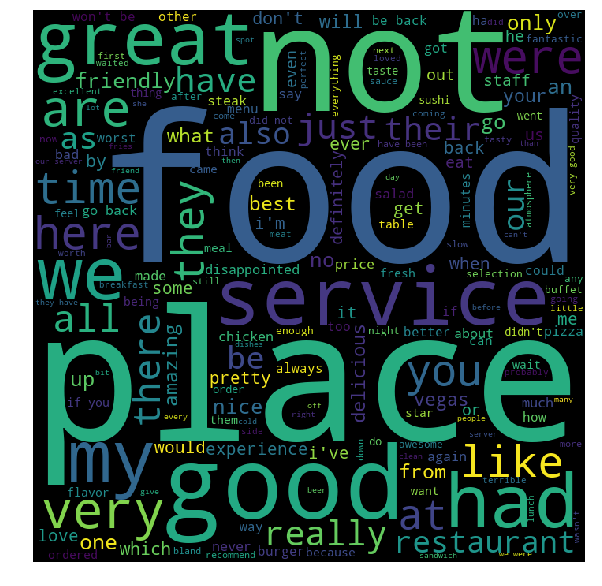

In [83]:
#from yelp

# Iterating through the .csv data file 
comment_words = ''
for i in df3.Text: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    comment_words += " ".join(separate)+' '
stop_words = ['a','and','the','it','is','was','of','to','in','that','for','with','but','this','so','on']
# Creating the Word Cloud
final_wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words)
# Displaying the WordCloud                    
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

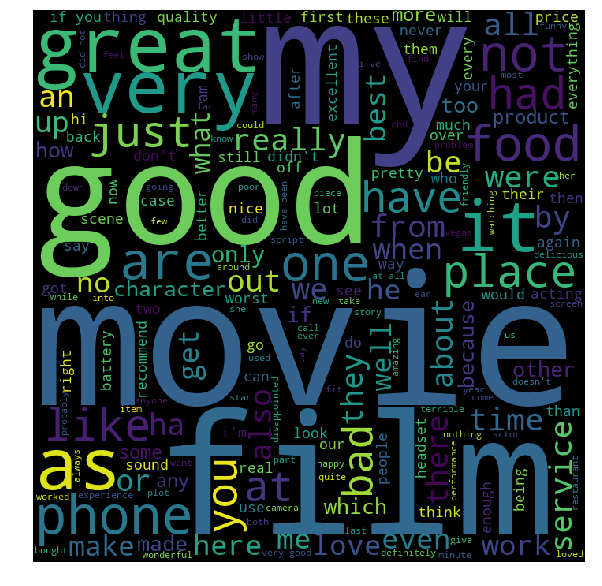

In [84]:
#from all data

# Iterating through the .csv data file 
comment_words = ''
for i in df.Text: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    comment_words += " ".join(separate)+' '
stop_words = ['a','and','the','it','is','was','of','to','in','that','for','with','but','this','so','on']
# Creating the Word Cloud
final_wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words)
# Displaying the WordCloud                    
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## 2. TFIDF

In [85]:
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import math
from sklearn.preprocessing import normalize

In [86]:
#calculate all TFIDF value

vectorizer = TfidfVectorizer(sublinear_tf=False, stop_words=None, token_pattern="(?u)\\b\\w+\\b", smooth_idf=True, norm='l2')
tfidf = vectorizer.fit_transform(df.Text)
df_tfidf = pd.DataFrame(tfidf.toarray(),columns=vectorizer.get_feature_names())
print(type(df_tfidf))
df_tfidf

<class 'pandas.core.frame.DataFrame'>


0   00    1   10  100   11   12   13   15  15g  ...  yukon  yum  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...  ...   
2726  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   
2727  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   
2728  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   
2729  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   
2730  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   

      yummy  yun    z  z500a  zero  zillion  zombie  zombiez  
0       0.0  0.0  0.0    0.0   0.0      0.0     0.0      0.0  
1       0.0  0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2       0.0  0.0  0.0    0.0   0.0      0.0     0.0      0.0  
3       0.0  0.0  0.0    0.0   0.0      0.0     0.0      0.0  
4       0.0  0.0  0.0    0.0   0.0      0.0     0.0      0.0  
...     ...  ...  ...    ...   ...      ...     ...      ...  
2726    0.0  0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2727    0.0  0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2728    0.0  0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2729    0.0  0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2730    0.0  0.0  0.0    0.0   0.0      0.0     0.0      0.0  

[2731 rows x 5183 columns]

In [87]:
#calculate sum of TFIDF for every features
TFIDF = df_tfidf.sum(axis = 0, skipna = True).to_frame()
TFIDF.columns=['value']
TFIDF['feature_name'] = TFIDF.index
print(TFIDF.columns)
TFIDF

Index(['value', 'feature_name'], dtype='object')


value feature_name
0         3.363796            0
00        0.312595           00
1         7.384907            1
10       10.207705           10
100       1.200161          100
...            ...          ...
z500a     0.384340        z500a
zero      2.099807         zero
zillion   0.539352      zillion
zombie    0.258803       zombie
zombiez   0.316415      zombiez

[5183 rows x 2 columns]

In [88]:
TFIDF_sorted = TFIDF.sort_values(by = ['value'],ascending = False)
TFIDF_sorted

value feature_name
the        160.658697          the
i          117.603786            i
and        110.248941          and
it         101.805222           it
a           97.021501            a
...               ...          ...
purity       0.013685       purity
stagy        0.013685        stagy
flag         0.013685         flag
legendary    0.013685    legendary
adrift       0.013685       adrift

[5183 rows x 2 columns]

In [89]:
fig = px.bar(TFIDF_sorted[0:300],x = 'feature_name',
              y='value')
fig.show()

## 3. Naive Bayes

In [90]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics

### Naive Bayes classifier - TF-IDF features

In [91]:
pipe_tfidf = Pipeline([('TFIDF', TfidfVectorizer()),
                    ('mnb', MultinomialNB(alpha=0.01))
                    ])

X, y = df.Text , df.Source
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

y_pred_tfidf = pipe_tfidf.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred_tfidf).sum()))



Number of mislabeled points out of a total 547 points : 89


In [92]:
#result of Naive Bayes classifier - TF-IDF features

print(metrics.classification_report(y_test, y_pred_tfidf, target_names=['amazon' , 'imdb' , 'yelp']))


              precision    recall  f1-score   support

      amazon       0.85      0.90      0.87       204
        imdb       0.79      0.79      0.79       143
        yelp       0.86      0.81      0.83       200

    accuracy                           0.84       547
   macro avg       0.83      0.83      0.83       547
weighted avg       0.84      0.84      0.84       547



### Naive Bayes classifier - word frequency features

In [93]:
pipe_count = Pipeline([('COUNT', CountVectorizer()),
                    ('mnb', MultinomialNB(alpha=0.01))
                    ])
y_pred_count = pipe_count.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred_count).sum()))

Number of mislabeled points out of a total 547 points : 84


In [94]:
#result of Naive Bayes classifier - word frequency features

print(metrics.classification_report(y_test, y_pred_count, target_names=['amazon' , 'imdb' , 'yelp']))

              precision    recall  f1-score   support

      amazon       0.87      0.87      0.87       204
        imdb       0.80      0.83      0.81       143
        yelp       0.85      0.84      0.85       200

    accuracy                           0.85       547
   macro avg       0.84      0.84      0.84       547
weighted avg       0.85      0.85      0.85       547



# PART4

What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? 
1. I think the heatmap is inefficient and useless because the matrix is sparse, we cannot get useful information from the heatmap.
2. making both 'category' and 'category_name' is redundent because they means the same information
3. To improve the data preprocessing, we should drop duplicate data and useless data (for example: some words appear only in  one text or some words appear in every text which might not be an important feature.)
4. What's more, while doing text classification, I think "stemming" will be another better choice in this session.